# Suavização de imagens (operações de vizinhança)

In [6]:
#Pra criar uma matriz de 1:
import numpy as np
m = np.ones([3,3])
m

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [7]:
#Alternativamente:
m2 = np.full((3,3),1)
m2

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

Gerando um sinal e sua cópia com ruídos:

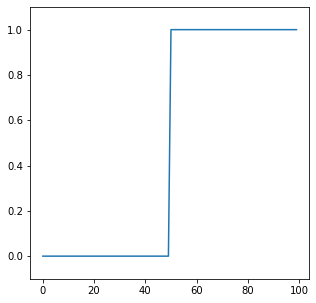

In [24]:
import matplotlib.pyplot as plt

step_signal = np.zeros(100)
step_signal[50:] = 1
fig, ax = plt.subplots()
# Aqui, eu poderia usar o figsize=(5, 5) para controlar o tamanho do plot:
# fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(step_signal)
ax.margins(y=0.1)


Adicionando ruído gaussiano:

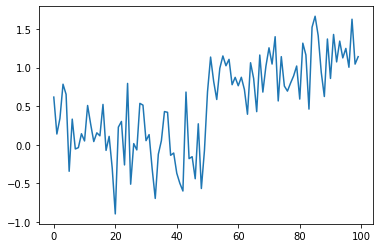

In [9]:
np.random.seed(0)
noisy_signal = (step_signal
                + np.random.normal(0, 0.35, step_signal.shape))
fig, ax = plt.subplots()
ax.plot(noisy_signal); 

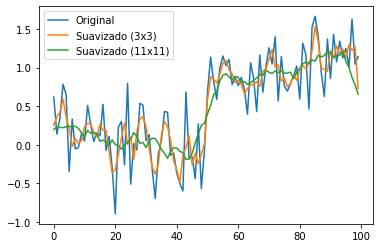

In [12]:
mean_kernel_3   = np.full((3,), 1/3)
smooth_signal_3 = np.convolve(noisy_signal, mean_kernel_3,
                              mode='same')#garante que o sinal de saída tenha o mesmo tamanho
mean_kernel_11   = np.full((11,), 1/11)
smooth_signal_11 = np.convolve(noisy_signal, mean_kernel_11,
                              mode='same')#garante que o sinal de saída tenha o mesmo tamanho
fig, ax = plt.subplots()
ax.plot(noisy_signal,label='Original')
ax.plot(smooth_signal_3,label='Suavizado (3x3)')
ax.plot(smooth_signal_11,label='Suavizado (11x11)')
ax.legend(); 

# Aplicando filtragem 2D

In [15]:
bright_square = np.zeros((7, 7), dtype=float)
bright_square[2:5, 2:5] = 1
print(bright_square)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


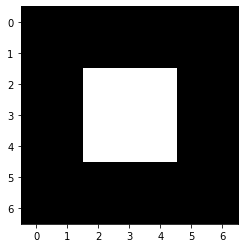

In [18]:
fig, ax = plt.subplots()
ax.imshow(bright_square,cmap='gray'); 

## Filtro de média

In [19]:
mean_kernel = np.full((3, 3), 1/9)
print(mean_kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


Now, let's take our mean kernel and apply it to every pixel of the image.
Applying a (linear) filter essentially means:
* Center a kernel on a pixel
* Multiply the pixels *under* that kernel by the values *in* the kernel
* Sum all the those results
* Replace the center pixel with the summed result

This process is known as convolution.

In [34]:
import scipy.ndimage as ndi
%precision 2 # casas decimais
print(f"{bright_square}\n") # em vez de fazer um print() pra pular linha, uso \n
print(f"{ndi.convolve(bright_square, mean_kernel)}\n")
print(f"{ndi.correlate(bright_square, mean_kernel)}\n")

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]

[[0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.11 0.22 0.33 0.22 0.11 0.  ]
 [0.   0.22 0.44 0.67 0.44 0.22 0.  ]
 [0.   0.33 0.67 1.   0.67 0.33 0.  ]
 [0.   0.22 0.44 0.67 0.44 0.22 0.  ]
 [0.   0.11 0.22 0.33 0.22 0.11 0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]]

[[0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.11 0.22 0.33 0.22 0.11 0.  ]
 [0.   0.22 0.44 0.67 0.44 0.22 0.  ]
 [0.   0.33 0.67 1.   0.67 0.33 0.  ]
 [0.   0.22 0.44 0.67 0.44 0.22 0.  ]
 [0.   0.11 0.22 0.33 0.22 0.11 0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]]



# Filtros de suavização de imagens
## Filtro Gaussiano

The classic image filter is the Gaussian filter. This is similar to the mean filter, in that it tends to smooth images. The Gaussian filter, however, doesn't weight all values in the neighborhood equally. Instead, pixels closer to the center are weighted more than those farther away.

Incidentally, for reference, let's have a look at what the Gaussian filter actually looks like. Technically, the value of the kernel at a pixel that is $r$ rows and $c$ cols from the center is:

$$
k_{r, c} = \frac{1}{2\pi \sigma^2} \exp{\left(-\frac{r^2 + c^2}{2\sigma^2}\right)}
$$

Practically speaking, this value is pretty close to zero for values more than $4\sigma$ away from the center, so practical Gaussian filters are truncated at about $4\sigma$:

For the Gaussian filter, `sigma`, the standard deviation, defines the size of the neighborhood.

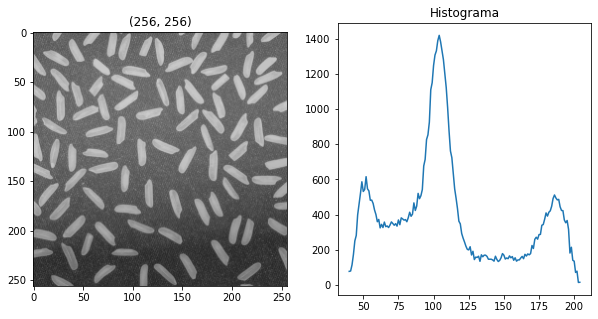

In [71]:
from skimage import io, filters, img_as_ubyte
from skimage.exposure import histogram
# Lendo uma imagem em tons de cinza:

arroz              = io.imread('rice.png')
hist, hist_centers = histogram(arroz)# histograma da imagem. hist_centers são os centros dos bins.
#Para imagens do tioi int, cada tom de cinza é seu próprio bin.

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(arroz, vmin=0, vmax=255, cmap='gray')
ax[0].set_title(arroz.shape); 
#ax[0].axis('off')

ax[1].plot(hist_centers, hist)
ax[1].set_title('Histograma'); 

Aplicando o filtro de gaussiana e exibindo o resultado

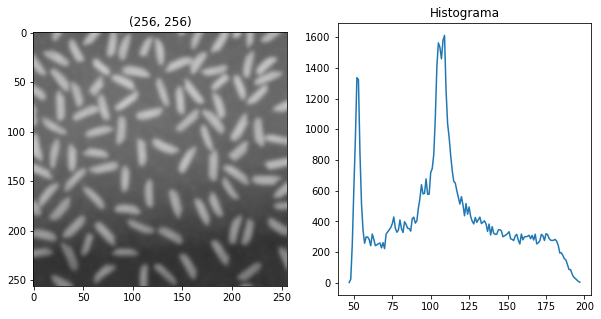

In [72]:
# The Gaussian filter returns a float image, regardless of input.
# Cast to float so the images have comparable intensity ranges.
arroz_gau = filters.gaussian(arroz, sigma=2,mode='nearest')
# o mode='nearest' significa que a função preenche a parte externa da borda com os valores
# mais próximos a ela para dar uma imagem de mesmo tamanho no output
# 'nearest'(aaaa|abcd|dddd)
# a saída do filtro é sempre float, converter para uint8
arroz_gau = img_as_ubyte(arroz_gau)
hist, hist_centers = histogram(arroz_gau)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(arroz_gau, vmin=0, vmax=255, cmap='gray')
ax[0].set_title(arroz_gau.shape); 
#print('Dimensões:',moedas.shape) # dimensões row, col, dim
#ax[0].axis('off')

ax[1].plot(hist_centers, hist)
ax[1].set_title('Histograma'); 

## Filtros de média e mediana

Filtro de média

Tamanho da máscara:
 [[1 1 1]
 [1 1 1]
 [1 1 1]]


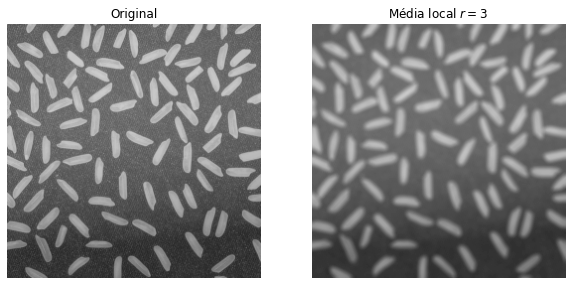

In [75]:
from skimage.filters.rank import mean, median
from skimage.morphology import disk, ball, square

loc_mean = mean(arroz, disk(3))

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].imshow(arroz, vmin=0, vmax=255, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(loc_mean, vmin=0, vmax=255, cmap='gray')
ax[1].set_title('Média local $r=3$')
 
print(f"Tamanho da máscara:\n {square(3)}"); 
for a in ax:
    a.axis('off')

Filtro de mediana

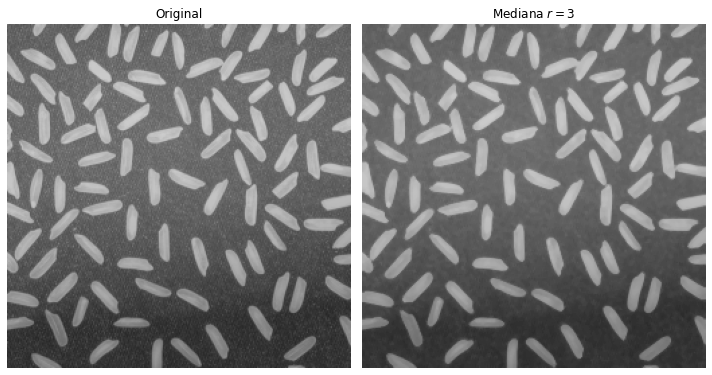

In [79]:
loc_median = median(arroz, square(3))
fig, axes = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()


ax[0].imshow(arroz, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(loc_median, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('Mediana $r=3$')

for a in ax:
    a.axis('off')

plt.tight_layout()

## E no caso de imagens coloridas?